# Dependencies

In [1]:
#@title Importing all dependencies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model as lm
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,precision_score
import random
import pandas as pd
from io import BytesIO
from google.colab.patches import cv2_imshow
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import rpy2.robjects as ro
import numpy as np
import PIL.Image as Image
import  rpy2
import matplotlib.pyplot as plt
from rpy2.robjects.vectors import StrVector
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
packnames = ('bnlearn')
utils.install_packages(packnames)
packnames = ('ggplot2')
utils.install_packages(packnames)
from rpy2.robjects.packages import SignatureTranslatedAnonymousPackage
rpackages.importr('bnlearn')
rpackages.importr('ggplot2')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/bnlearn_4.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1289569 bytes (1.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

rpy2.robjects.packages.Package as a <module 'ggplot2'>

# Exploratory Data Analysis

In [2]:
#@title Joining Both tables on Product
merchandisingproduct=pd.read_csv('/content/merchandinsingProductData.csv')
webmarketing=pd.read_csv('/content/webMarketingProductData.csv')
data=pd.merge(merchandisingproduct, webmarketing, on='Product')
data

,Product,CR,AIV,MD,Price,PPC,Display,Budget,Competitor
0,Product1,-6.301026,0.335416,-1.061612,-0.512476,-1.886534,1.377055,-0.031446,0.985445
1,Product2,1.419551,-0.107248,0.667254,-0.002585,0.528836,0.232838,-1.227620,-0.173279
2,Product3,5.593748,-2.714049,1.111165,-0.533576,-0.152345,-0.804339,-0.145098,0.088497
3,Product4,-12.153937,1.705408,-2.536226,1.201508,-2.371974,2.191952,-0.806393,0.371065
4,Product5,1.926073,-0.489949,-0.038040,-0.164677,1.368827,0.969883,1.479894,1.515444
...,...,...,...,...,...,...,...,...,...
44995,Product44996,-3.238228,-1.880081,-0.224839,-1.285602,-3.573467,-0.948699,-1.549884,0.066666
44996,Product44997,4.936164,-1.027484,0.430861,-1.555606,3.281081,1.647693,0.751034,0.034552
44997,Product44998,-6.027262,2.159713,-0.999066,1.349805,-2.538348,-0.641967,-0.042389,0.469479
44998,Product44999,2.488245,0.513433,0.403235,1.154874,0.837724,-0.588413,0.967906,0.527310


In [3]:
#@title Nulls Check and Data Type
print(data.isna().sum())
print(data.shape)
print(data.info())

Product       0
CR            0
AIV           0
MD            0
Price         0
PPC           0
Display       0
Budget        0
Competitor    0
dtype: int64
(45000, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     45000 non-null  object 
 1   CR          45000 non-null  float64
 2   AIV         45000 non-null  float64
 3   MD          45000 non-null  float64
 4   Price       45000 non-null  float64
 5   PPC         45000 non-null  float64
 6   Display     45000 non-null  float64
 7   Budget      45000 non-null  float64
 8   Competitor  45000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.4+ MB
None


                 CR           AIV  ...        Budget    Competitor
count  45000.000000  45000.000000  ...  45000.000000  45000.000000
mean       0.020651     -0.006279  ...      0.013868      0.000319
std        5.017621      1.708342  ...      0.999542      1.001016
min      -20.503464     -7.059203  ...     -4.294501     -4.419492
25%       -3.377569     -1.160855  ...     -0.652362     -0.675806
50%        0.037656     -0.003414  ...      0.010460     -0.001979
75%        3.400656      1.137066  ...      0.682180      0.676059
max       19.297281      7.382050  ...      4.214841      4.233179

[8 rows x 8 columns]


Text(0.5, 1.0, 'Distribution of Competitor')

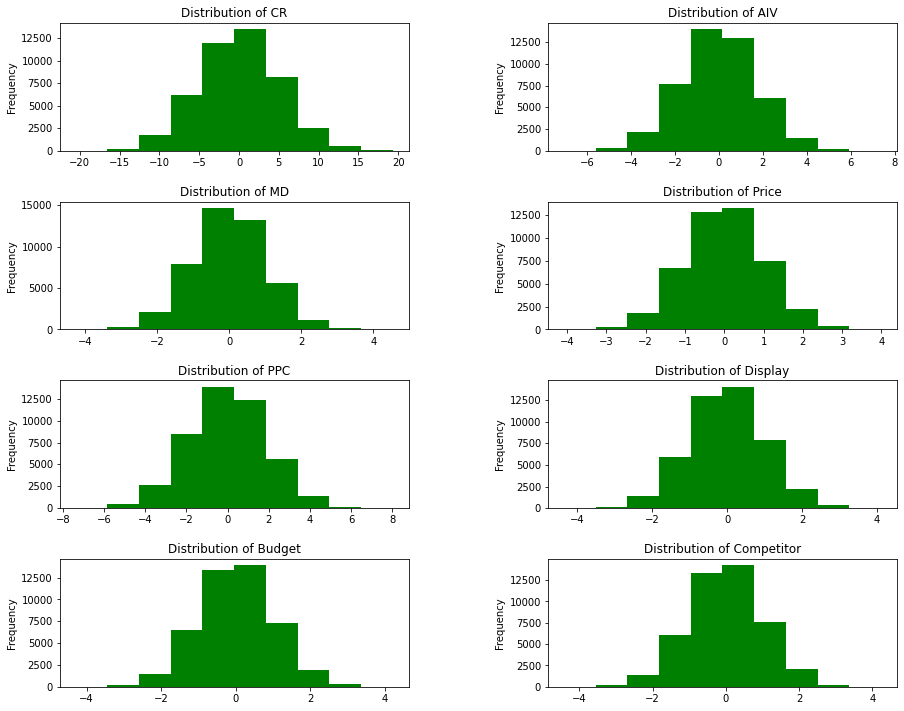

In [4]:
#@title   Ranges of Variables and Distribution


print(data.describe())
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)


plt.subplot(5, 2, 1,)
plt.subplots_adjust(bottom=0.1)
data['CR'].plot(kind='hist',color='green',figsize=(15,15))
plt.title("Distribution of CR")



plt.subplot(5, 2, 2)
data['AIV'].plot(kind='hist' ,color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of AIV")




plt.subplot(5, 2, 3)
data['MD'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of MD")


plt.subplot(5, 2, 4)
data['Price'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Price")


plt.subplot(5, 2, 5)
data['PPC'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of PPC")

plt.subplot(5, 2, 6)
data['Display'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Display")

plt.subplot(5, 2, 7)
data['Budget'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Budget")

plt.subplot(5, 2, 8)
data['Competitor'].plot(kind='hist',color='green',figsize=(15,15))
plt.subplots_adjust(bottom=0.1)
plt.title("Distribution of Competitor")

 1. Follow Normal Distribution
 2. No outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

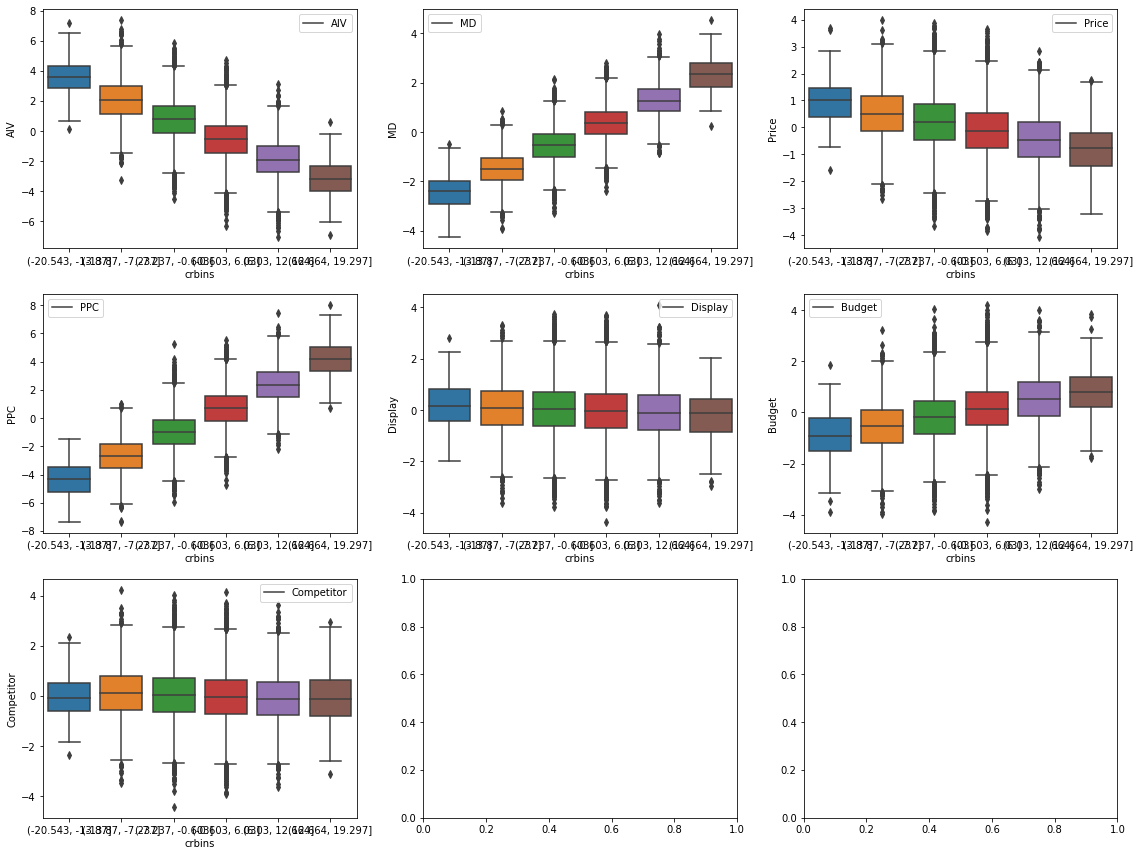

In [5]:
#@title Distribution of CR respective to other Variables
dk=data
dk['crbins']=pd.cut(data['CR'], 6)
cols=dk.columns.to_list()
cols.remove('Product')
cols.remove('CR')
cols.remove('crbins')
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    
    sns.boxplot("crbins", col, ax = ax[i], data=dk)
    ax[i].legend([col], loc='best')
    i += 1
    
plt.tight_layout()
plt.show()

# Causal relationship between MD and CR

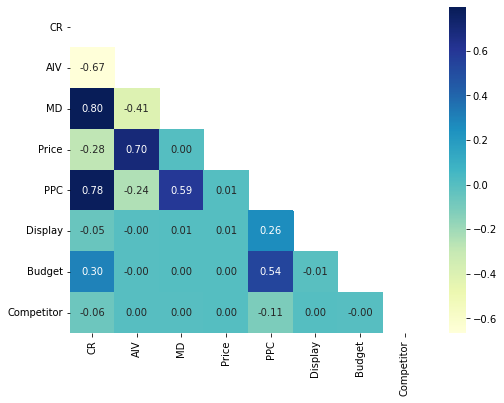

In [6]:
#@title Correlation Check
import numpy as np
import seaborn as sns
plt.figure(figsize=(8,6))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()



1.   CR Shows High Correlation with PPC and MD , and negative relationship with AIV
2.   PPC and MD shows some kind of relationship as explained in assignment 



In [7]:
#@title Checking if combined effect of the MD and PPC has an effect on CR  with MANOVA to understand if they have different means 
cols=data.columns.to_list()
cols.remove('CR')
maov=MANOVA.from_formula('MD + PPC  ~ CR', data=data)
print(maov.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
          Intercept        Value  Num DF   Den DF   F Value Pr > F
------------------------------------------------------------------
             Wilks' lambda 1.0000 2.0000 44997.0000  0.7457 0.4744
            Pillai's trace 0.0000 2.0000 44997.0000  0.7457 0.4744
    Hotelling-Lawley trace 0.0000 2.0000 44997.0000  0.7457 0.4744
       Roy's greatest root 0.0000 2.0000 44997.0000  0.7457 0.4744
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
           CR           Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.2159 2.0000 44997.0000 81695.2633 0.0000
         Pillai'

The Wilks Lambda for CR , its Pvalue is quite significant,so we can say that mean
values of MD and PPC ,combined do not have an cancelling effect and have different means

**Conditonal independence** 

 Correlation and Covariance can onlyshow the half story and indicate some kind of relationship, but to understand full story of how everything inside data is effecting each other

I created Directed acyclic graph to find out relationship and casualtiy chains between variables , to understand how CR is getting effected



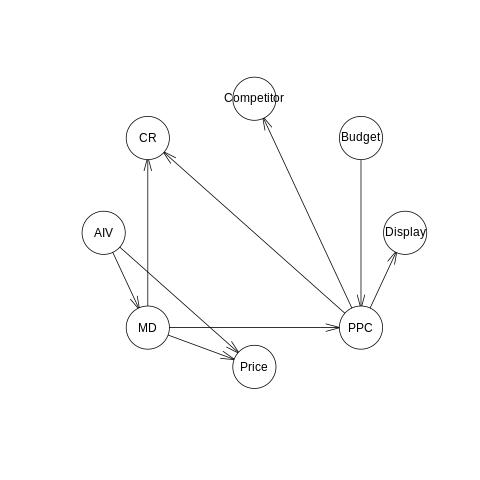

In [8]:
#@title Building Directed acyclic Graphs

co=data.columns.to_list()
co.remove('Product')
co.remove('crbins')
data[co] = data[co].apply(pd.to_numeric, errors='coerce')
#data.info()
#data.isnull().any().any()
#df = pandas2ri.py2rpy(data)

df=data[co]
df.to_csv('df.csv')
string = """
df <- read.table('/content/df.csv', sep = ",")
colnames(df) <- as.character(unlist(df[1,]))
df = df[-1, ]
colnames(df)
class(df[,2])
df <- df[, -1]
df[] <- lapply( df, as.numeric) 

df$CR[is.na(df$CR)] = median(df$CR, na.rm=TRUE)
df$AIV[is.na(df$AIV)] = median(df$AIV, na.rm=TRUE)
df$MD[is.na(df$MD)] = median(df$MD, na.rm=TRUE)
df$Price[is.na(df$Price)] = median(df$Price, na.rm=TRUE)
df$PPC[is.na(df$PPC)] = median(df$PPC, na.rm=TRUE)
df$Display[is.na(df$Display)] = median(df$Display, na.rm=TRUE)
df$Budget[is.na(df$Budget)] = median(df$Budget, na.rm=TRUE)
df$Competitor[is.na(df$Competitor)] = median(df$Competitor, na.rm=TRUE)

df$CR = cut(df$CR, breaks = c(-Inf, -10, -5, 0, 5,10, Inf), 
                  labels = c("CR < -10", "CR -10-(-5)", "CR -5-0", "CR 0-5","CR 5-10", "CR 10+"))
df$AIV = cut(df$AIV, breaks = c(-Inf, -4, -2, 0,2,4,6, Inf), 
                         labels = c("AIV < -4", "AIV < -4-(-2)", "AIV -2-0", "AIV  0-2","AIV 2-4","AIV 4-6","AIV 6+"))
df$MD = cut(df$MD, breaks = c(-Inf, -4, -2, 0, 2,4, Inf), 
                      labels = c("MD < -4", "MD -4-(-2)", "MD -2-0", "MD 0-2","MD 2-4", "MD 4+"))
df$Price = cut(df$Price, breaks = c(-Inf, -3, -2, -1, 0,1,2,3,4, Inf), 
                    labels = c("PRICE < -3", "PRICE  -3-(-2)", "PRICE -2-(-1)", "PRICE -1-0", "PRICE 0-1","PRICE 1-2","PRICE 2-3","PRICE 3-4","PRICE 4+"))

df$PPC = cut(df$PPC, breaks = c(-Inf, -6, -4, -2, 0,2,4,6, Inf), 
                    labels = c("PPC < -6", "PPC  -6-(-4)", "PPC -4-(-2)", "PPC -2-0", "PPC 0-2","PPC 2-4","PPC 4-6","PPC 6+"))


df$Display = cut(df$Display, breaks = c(-Inf, -4, -2, 0,2,4, Inf), 
                    labels = c("Display < -4", "Display  -4-(-2)", "Display -2-(0)", "PPC 0-2","PPC 2-4","PPC 4+"))

df$Budget =  cut(df$Budget, breaks = c(-Inf, -4, -2, 0,2,4, Inf), 
                    labels = c("budget < -4", "budget  -4-(-2)", "budget -2-(0)", "budget 0-2","budget 2-4","budget 4+"))

df$Competitor = cut(df$Competitor, breaks = c(-Inf, -2, 0,2, Inf), 
                    labels = c("Competitor < -2","Competitor -2-0", "Competitor 0-2","Competitor 2+"))



bl = matrix(c("CR",	"Display",
              "CR",	"AIV",
              "CR",	"MD",
              "CR","PPC",
              "AIV","CR"
              ), ncol = 2, byrow = TRUE, dimnames = list(NULL, c("from", "to")))


dag = hc(df,blacklist = bl)
dag
figure=plot(dag)
jpeg("dag.jpg")
plot(dag)
dev.off()
"""
powerpack = SignatureTranslatedAnonymousPackage(string, "powerpack")

c = cv2.imread('dag.jpg')
cv2_imshow(c)




Found very interesting DAG, 
 which shows 




1.  MD is directly effecting CR , PRICE AND PPC
2. MD parent is AIV, which makes 
3. PPC have an effect on CR but being MD  and Budget as parent of PPC , CR is more related to Budget and MD/AIV, 
4.  Competior Score is also effecting PPC which makes sense



**So CR is being mainly effected by Budget and MD**

Coditional Probabilties-
 Creating Baysean Network to Calculate Conditonal Probabilities,
which means the probability of an event ( A ), given that another ( B ) has already occurred.

for example to see what happens to CR on Certain MD according to Baysean networks are based on Condtional Independence which means in this case CR will be only dependent on MD

 Created queries with 
 1. Effect on CR with MD
 2. Effect on CR with Budget
 3. Effect on PPC with MD

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image

R[write to console]: Saving 7 x 7 in image



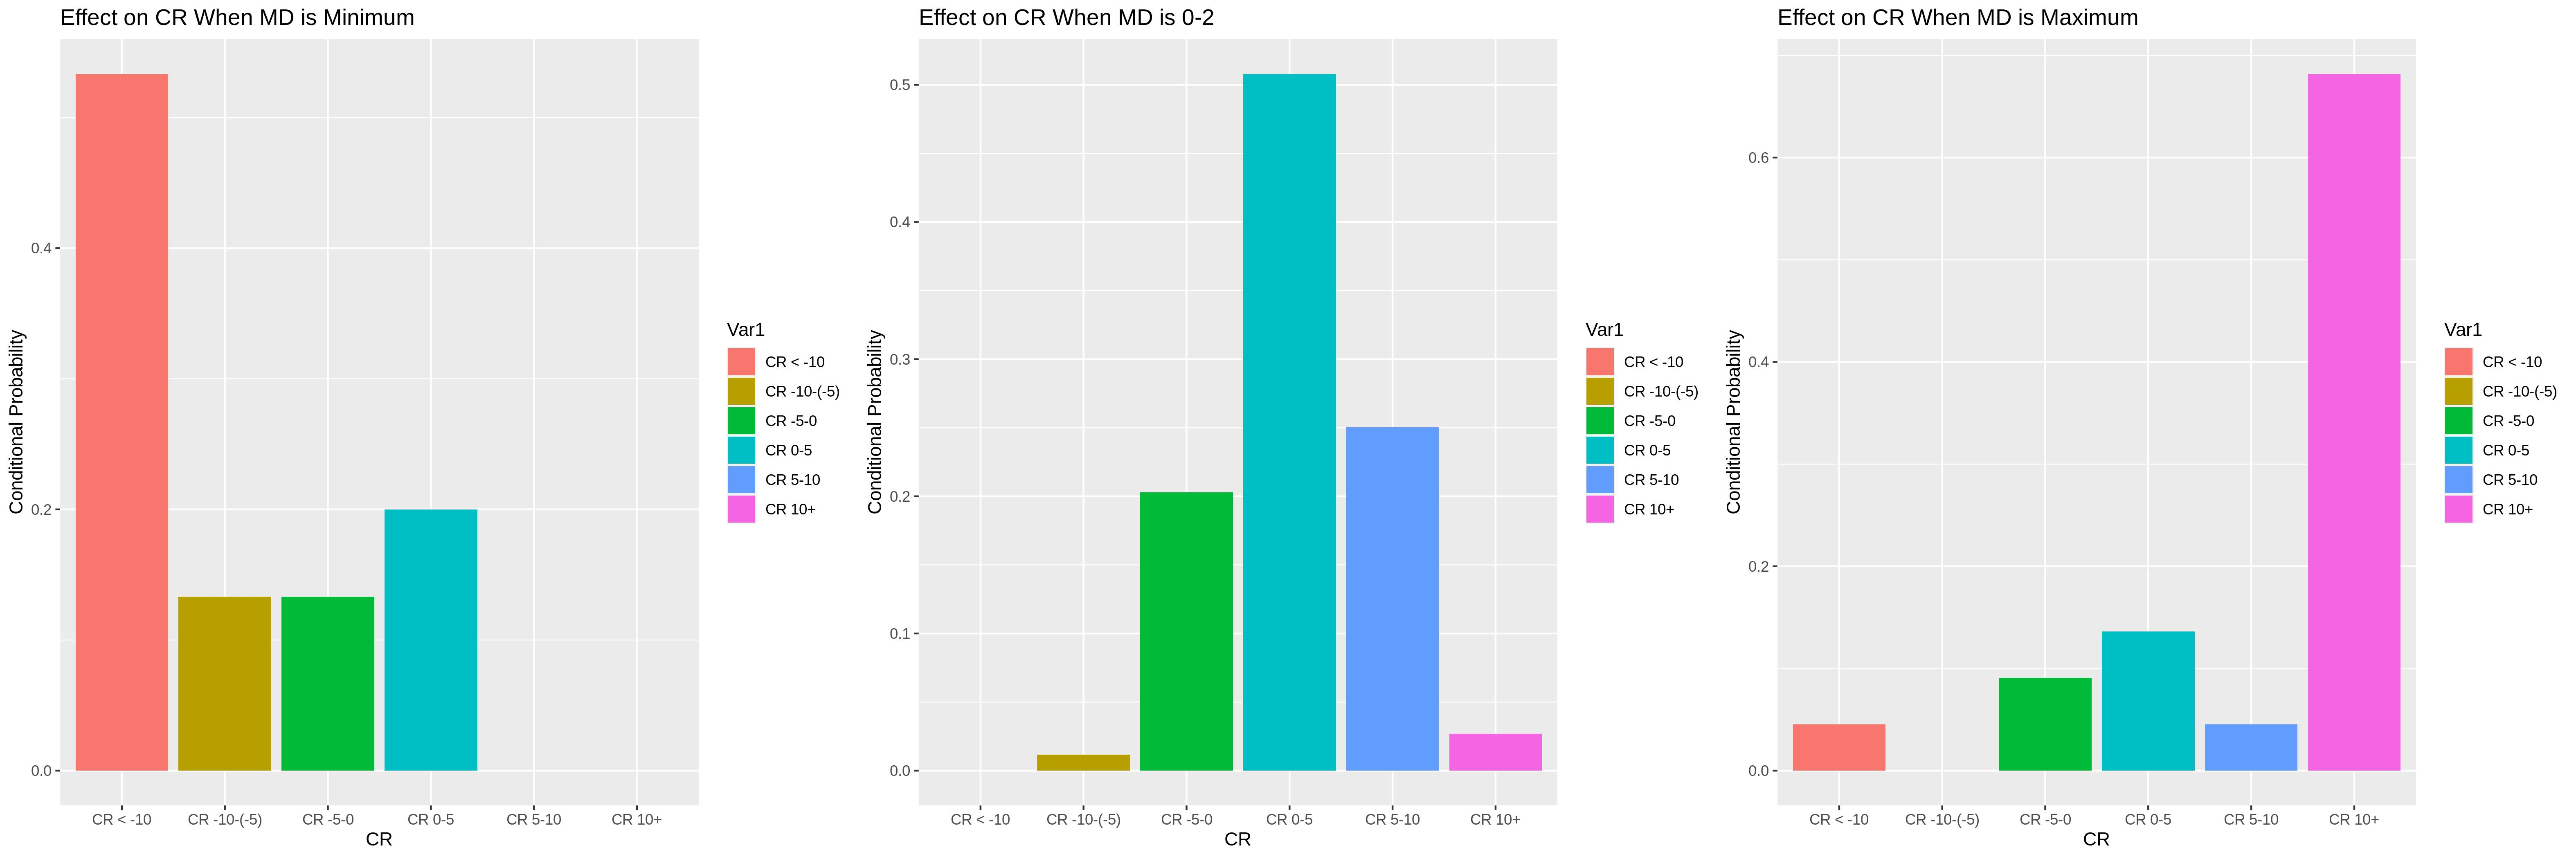

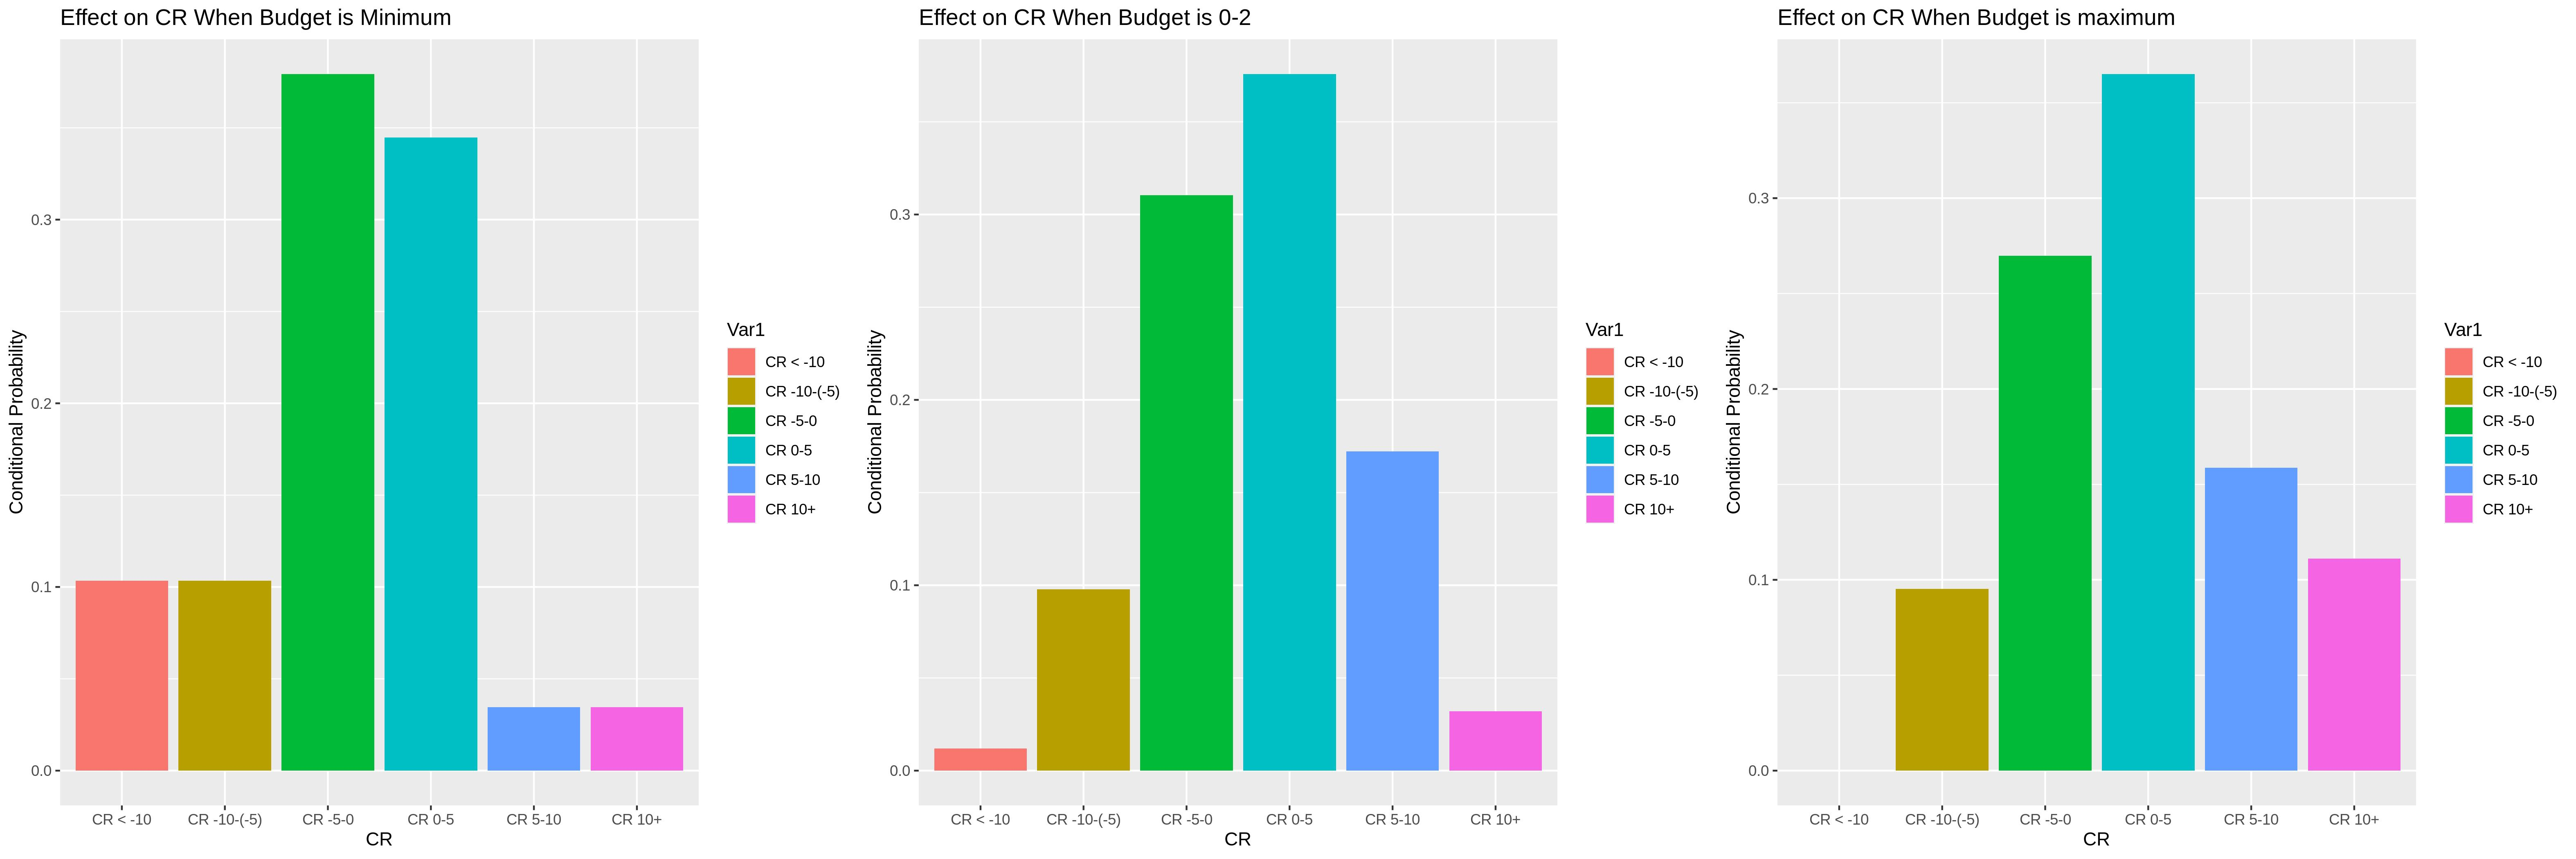

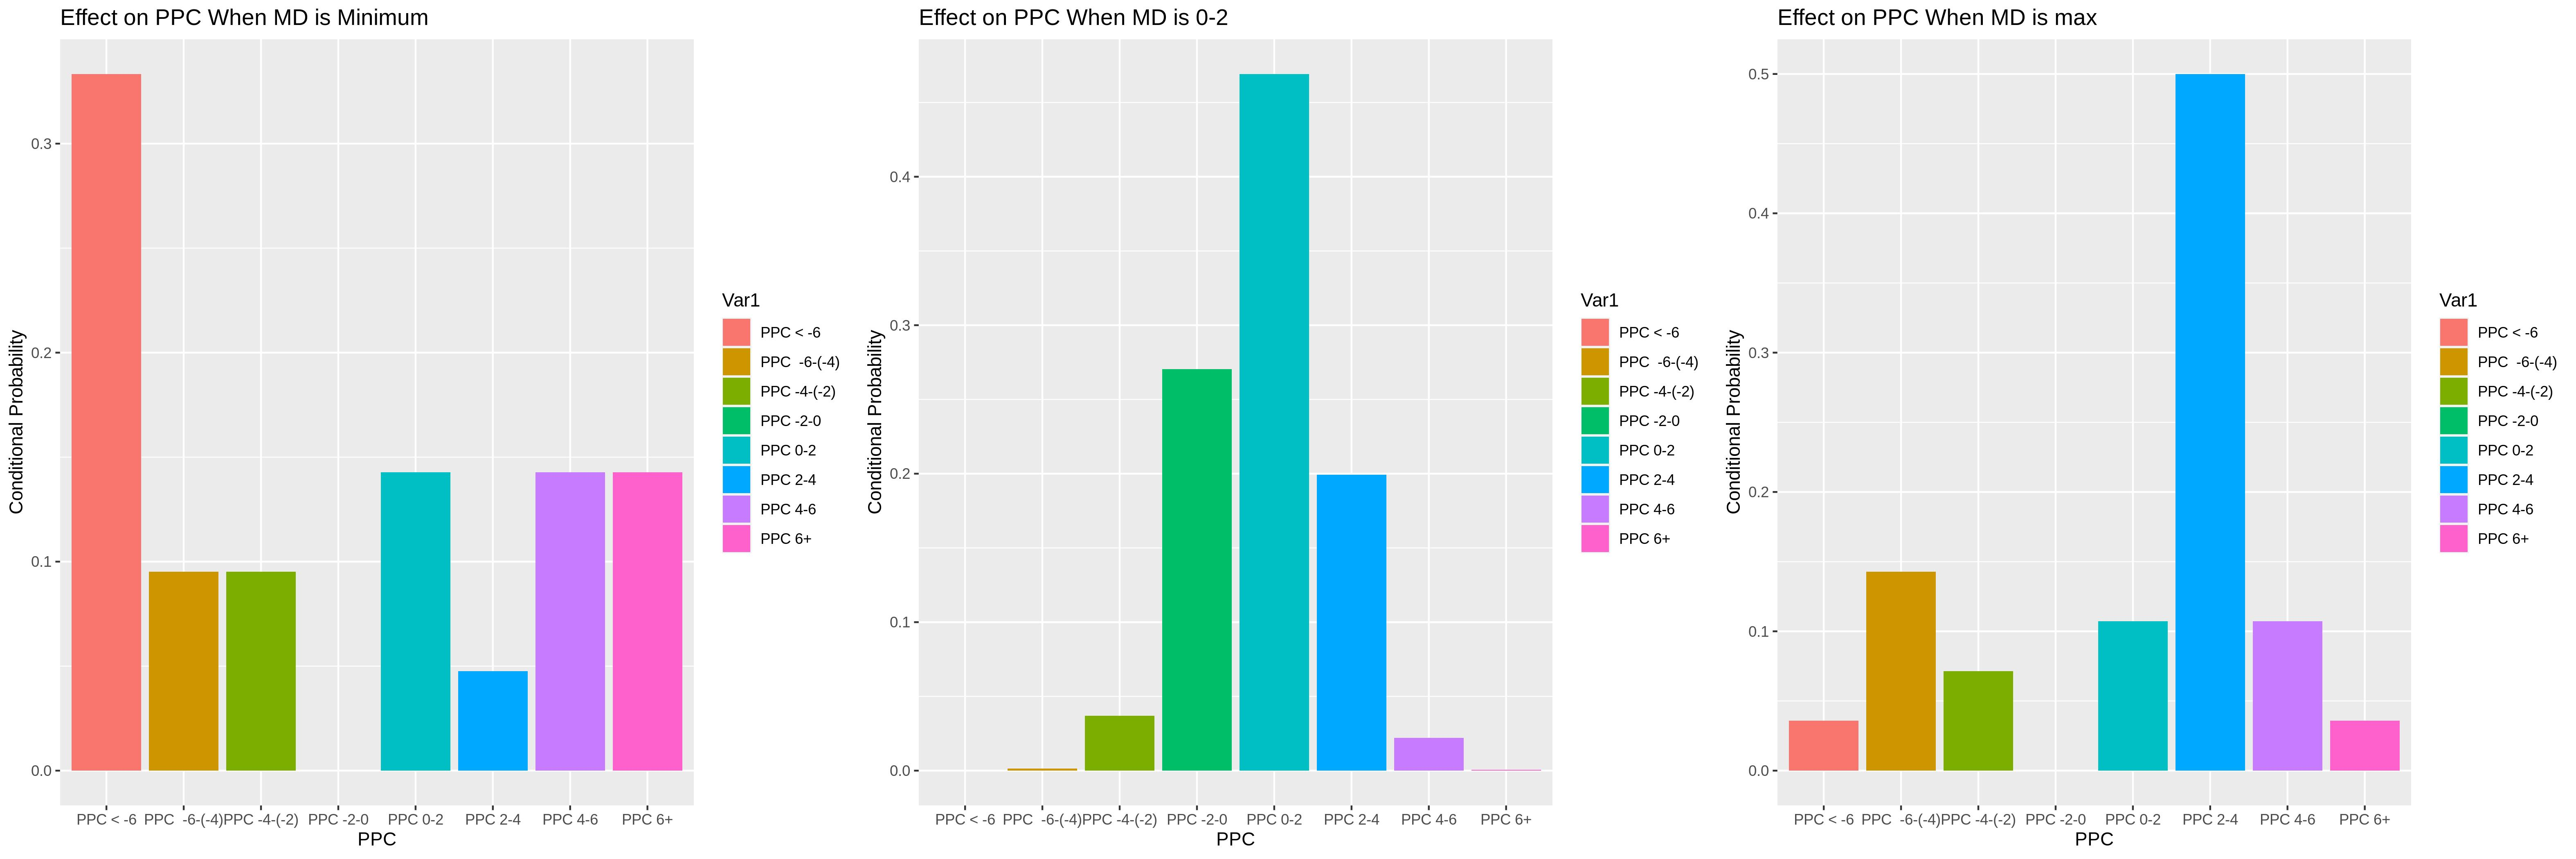

In [9]:
#@title Queries for Conditional Probabilities

string = """
df <- read.table('/content/df.csv', sep = ",")
colnames(df) <- as.character(unlist(df[1,]))
df = df[-1, ]
colnames(df)
class(df[,2])
df <- df[, -1]
df[] <- lapply( df, as.numeric) 

df$CR[is.na(df$CR)] = median(df$CR, na.rm=TRUE)
df$AIV[is.na(df$AIV)] = median(df$AIV, na.rm=TRUE)
df$MD[is.na(df$MD)] = median(df$MD, na.rm=TRUE)
df$Price[is.na(df$Price)] = median(df$Price, na.rm=TRUE)
df$PPC[is.na(df$PPC)] = median(df$PPC, na.rm=TRUE)
df$Display[is.na(df$Display)] = median(df$Display, na.rm=TRUE)
df$Budget[is.na(df$Budget)] = median(df$Budget, na.rm=TRUE)
df$Competitor[is.na(df$Competitor)] = median(df$Competitor, na.rm=TRUE)

df$CR = cut(df$CR, breaks = c(-Inf, -10, -5, 0, 5,10, Inf), 
                  labels = c("CR < -10", "CR -10-(-5)", "CR -5-0", "CR 0-5","CR 5-10", "CR 10+"))
df$AIV = cut(df$AIV, breaks = c(-Inf, -4, -2, 0,2,4,6, Inf), 
                         labels = c("AIV < -4", "AIV < -4-(-2)", "AIV -2-0", "AIV  0-2","AIV 2-4","AIV 4-6","AIV 6+"))
df$MD = cut(df$MD, breaks = c(-Inf, -4, -2, 0, 2,4, Inf), 
                      labels = c("MD < -4", "MD -4-(-2)", "MD -2-0", "MD 0-2","MD 2-4", "MD 4+"))
df$Price = cut(df$Price, breaks = c(-Inf, -3, -2, -1, 0,1,2,3,4, Inf), 
                    labels = c("PRICE < -3", "PRICE  -3-(-2)", "PRICE -2-(-1)", "PRICE -1-0", "PRICE 0-1","PRICE 1-2","PRICE 2-3","PRICE 3-4","PRICE 4+"))

df$PPC = cut(df$PPC, breaks = c(-Inf, -6, -4, -2, 0,2,4,6, Inf), 
                    labels = c("PPC < -6", "PPC  -6-(-4)", "PPC -4-(-2)", "PPC -2-0", "PPC 0-2","PPC 2-4","PPC 4-6","PPC 6+"))


df$Display = cut(df$Display, breaks = c(-Inf, -4, -2, 0,2,4, Inf), 
                    labels = c("Display < -4", "Display  -4-(-2)", "Display -2-(0)", "PPC 0-2","PPC 2-4","PPC 4+"))

df$Budget =  cut(df$Budget, breaks = c(-Inf, -4, -2, 0,2,4, Inf), 
                    labels = c("budget < -4", "budget  -4-(-2)", "budget -2-(0)", "budget 0-2","budget 2-4","budget 4+"))

df$Competitor = cut(df$Competitor, breaks = c(-Inf, -2, 0,2, Inf), 
                    labels = c("Competitor < -2","Competitor -2-0", "Competitor 0-2","Competitor 2+"))



bl = matrix(c("CR",	"Display",
              "CR",	"AIV",
              "CR",	"MD",
              "CR","PPC",
              "AIV","CR"), ncol = 2, byrow = TRUE, dimnames = list(NULL, c("from", "to")))



dag = hc(df,blacklist = bl)


df[] <- lapply( df, factor) 
cvmodel = bn.cv(dag, data = df, runs = 10, method = "k-fold", folds = 10, loss = "pred", loss.args = list(target = "CR"))
cvmodel



fit = bn.fit(dag, df, method = "bayes")
#print('Effect on CR When MD is Minimum' )
#print(prop.table(table(cpdist(fit, n = 10^6, nodes = c("CR"), evidence = (MD == "MD < -4")))))
tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("CR"), evidence = (MD == "MD < -4"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col()+ ggtitle("Effect on CR When MD is Minimum")+ xlab("CR") + ylab("Conditional Probability")
ggsave(filename="mdminimumcr.jpg", plot=figure) 


tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("CR"), evidence = (MD == "MD 0-2"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col()+ ggtitle("Effect on CR When MD is 0-2")+ xlab("CR") + ylab("Conditional Probability")
ggsave(filename="md0-2cr.jpg", plot=figure)

tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("CR"), evidence = (MD == "MD 4+"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col()+ ggtitle("Effect on CR When MD is Maximum")+ xlab("CR") + ylab("Conditional Probability")
ggsave(filename="mdmaxcr.jpg", plot=figure)


tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("CR"), evidence = (Budget == "budget < -4"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col() + ggtitle("Effect on CR When Budget is Minimum")+ xlab("CR") + ylab("Conditional Probability")
ggsave(filename="budmincr.jpg", plot=figure)


tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("CR"), evidence = (Budget == "budget 0-2"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col() + ggtitle("Effect on CR When Budget is 0-2")+ xlab("CR") + ylab("Conditional Probability")
ggsave(filename="bud0-2cr.jpg", plot=figure)


tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("CR"), evidence = (Budget == "budget 4+"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col() + ggtitle("Effect on CR When Budget is maximum")+ xlab("CR") + ylab("Conditional Probability")
ggsave(filename="budmaxcr.jpg", plot=figure)


tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("PPC"), evidence = (MD == "MD < -4"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col() + ggtitle("Effect on PPC When MD is Minimum")+ xlab("PPC") + ylab("Conditional Probability")
ggsave(filename="mdminppc.jpg", plot=figure)



tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("PPC"), evidence = (MD == "MD 0-2"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col() + ggtitle("Effect on PPC When MD is 0-2")+ xlab("PPC") + ylab("Conditional Probability")
ggsave(filename="md0-2ppc.jpg", plot=figure)



tab<-prop.table(table(cpdist(fit, n = 10^6, nodes = c("PPC"), evidence = (MD == "MD 4+"))))
tab <- as.data.frame(tab)
figure <- ggplot(tab,aes(x=Var1,y=Freq,fill=Var1)) + geom_col() + ggtitle("Effect on PPC When MD is max")+ xlab("PPC") + ylab("Conditional Probability")
ggsave(filename="mdmaxppc.jpg", plot=figure)
"""
powerpack = SignatureTranslatedAnonymousPackage(string, "powerpack")

img1 = cv2.imread('mdminimumcr.jpg')
img2 = cv2.imread('md0-2cr.jpg')
img3 = cv2.imread('mdmaxcr.jpg')
img4 = cv2.imread('budmincr.jpg')
img5 = cv2.imread('bud0-2cr.jpg')
img6 = cv2.imread('budmaxcr.jpg')
img7 = cv2.imread('mdminppc.jpg')
img8 = cv2.imread('md0-2ppc.jpg')
img9 = cv2.imread('mdmaxppc.jpg')


Hori1 = np.concatenate((img1, img2,img3), axis=1)
Hori2 = np.concatenate((img4, img5,img6), axis=1)
Hori3 = np.concatenate((img7, img8,img9), axis=1)


  
cv2_imshow(Hori1)
cv2_imshow(Hori2)
cv2_imshow(Hori3)

  


As calculating Conditonal Probabilties,with conditional independence from Baysean Networks we can clearly see relationship between MD and CR
  and PPC and MD
  
1. Image 7 - When MD is low , there is high probability that PPC will be low but in case if  MD is high , the probability to have higher PPC is not high

2.   Image 1 =At lower MD, the probability of having LOW CR is very high
3.   Image 3 = At Maximum MD , the probailities to have higher CR is very High

4.  image 6 - When Budget is high, probability of having low CR (less than zero) is very low 


# Predictive Model

Feature engineering

Product category and type are not available to create a cluster key , so Grouping Products on basis of K means Clustering 

In [10]:
#@title 
from sklearn.cluster import KMeans
dk = df.drop('CR', 1)

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dk)
    sse.append(km.inertia_)

Elbow method

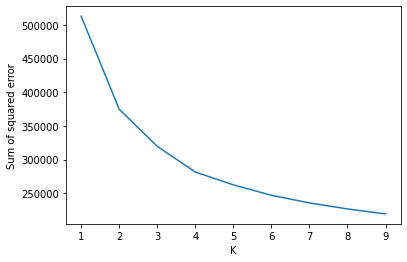

In [11]:
#@title 
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [12]:
#@title
kmeans = KMeans(n_clusters=4)

df['kmeans']= ((kmeans.fit_predict(dk)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualising Groups with TSNE to see if groups are not overlapping each other , which can confuse the model,

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 45000 samples in 0.071s...
[t-SNE] Computed neighbors for 45000 samples in 12.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45000
[t-SNE] Computed conditional probabilities for sample 2000 / 45000
[t-SNE] Computed conditional probabilities for sample 3000 / 45000
[t-SNE] Computed conditional probabilities for sample 4000 / 45000
[t-SNE] Computed conditional probabilities for sample 5000 / 45000
[t-SNE] Computed conditional probabilities for sample 6000 / 45000
[t-SNE] Computed conditional probabilities for sample 7000 / 45000
[t-SNE] Computed conditional probabilities for sample 8000 / 45000
[t-SNE] Computed conditional probabilities for sample 9000 / 45000
[t-SNE] Computed conditional probabilities for sample 10000 / 45000
[t-SNE] Computed conditional probabilities for sample 11000 / 45000
[t-SNE] Computed conditional probabilities for sample 12000 / 45000
[t-SNE] Computed conditional probabilities for s

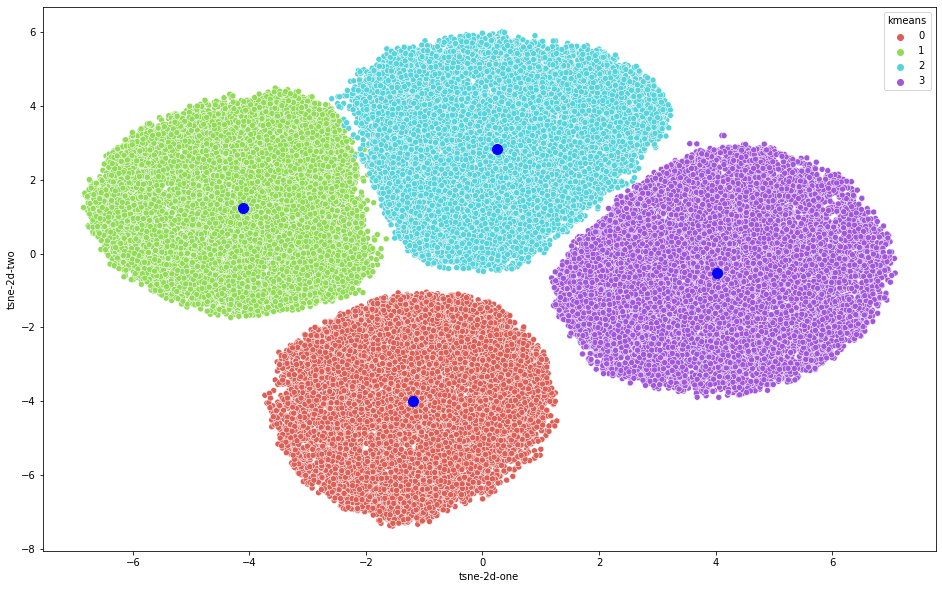

In [13]:
#@title 
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaledx = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns.to_list())
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=123)
tsne_results = tsne.fit_transform(scaledx)
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
tsne_cluster = df.groupby('kmeans').agg({'tsne-2d-one':'mean', 'tsne-2d-two':'mean'}).reset_index()

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="kmeans",
    palette=sns.color_palette("hls", 4),
    data=df,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

Groups are not overlapping each other

1. Creating Bins for continous variables and the doing one hot encoding


2. Wider the bin of CR more Bias is introduced, smaller the bin of CR more variance is introduced, so bins made on basis of Bias Variance tradeoff

In [14]:
#@title 
pd.options.mode.chained_assignment = None  
X=df[['MD','PPC','kmeans']]
y=df[['CR']]
X['MD']=pd.cut(X.MD,bins=[-4,0,4])
X['PPC']=pd.cut(X.PPC,bins=[-6,0,4,6])
y['CR']=pd.cut(y.CR,bins=[-10,-5,0,5,10])
X=pd.get_dummies(X['MD']).join(pd.get_dummies(X['PPC']),rsuffix='PPC').join(pd.get_dummies(X['kmeans']),rsuffix='kmeans')
y['CR'] = y['CR'].cat.add_categories(0)
y['CR'].fillna(0, inplace =True) 
y=y.astype('str')
print('CR BINS-',y['CR'].unique())



CR BINS- ['(-10, -5]' '(0, 5]' '(5, 10]' '0' '(-5, 0]']


after one hot encoding we have many dimensions which can create variance , so reducing dimensions with PCA

Cummulative variance:
 [0.47523663 0.69137344 0.83173097 0.95070078 0.98792257 0.9997833
 0.99998753 1.         1.        ]


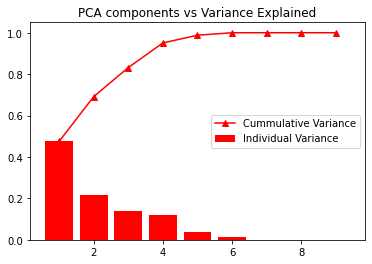

In [15]:
#@title 
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

var_exp = pca.explained_variance_ratio_
cum_var = np.cumsum(pca.explained_variance_ratio_)
print("Cummulative variance:\n", cum_var)
plt.plot(range(1, len(var_exp)+1), cum_var, color='r', marker='^', label="Cummulative Variance")
plt.bar(range(1, len(var_exp)+1), var_exp, color='r', label="Individual Variance")
plt.legend(loc='best')
plt.title("PCA components vs Variance Explained")
plt.show()

68 % of data is explained by 2 components

1 Standardizing the data to bring all components to same scale, to remove chances of Bias

In [16]:
#@title 

pca8 = PCA(n_components = 6)
X_pca = pd.DataFrame(pca8.fit_transform(X))
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(X_pca), columns=X_pca.columns)

1. Kfold Cross validation - to find the best split of train and validation data

2. Grid Search CV to find best hyperparameters and to avoid overfitting 

In [17]:
#@title 
Kfold=[0.10,0.40,0.50,0.80]
score=[]
for i in Kfold:
  X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=i, random_state=3)
  lr = DecisionTreeClassifier()
  clf = pipeline.Pipeline([('lr', lr)])

  param_grid = {'lr__criterion':['gini','entropy'],'lr__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

  f_scorer = metrics.make_scorer(f1_score, greater_is_better = True, average='micro')

  model = GridSearchCV(estimator = clf, param_grid=param_grid, scoring=f_scorer,
                                     verbose=10, n_jobs=-1, iid=True, refit=True, cv=10)



  model.fit(X_train, y_train)
  print('test size',i)
  print("Best score: %0.3f" % model.best_score_)

  print("Best parameters set:")
  best_parameters = model.best_estimator_.get_params()
  for param_name in sorted(param_grid.keys()):
  	print("\t%s: %r" % (param_name, best_parameters[param_name]))
  zzz=[model.best_score_,i,param_name,best_parameters[param_name]]
  score.append(zzz)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

test size 0.1
Best score: 0.639
Best parameters set:
	lr__criterion: 'gini'
	lr__max_depth: 7
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1489s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 244 tas

test size 0.4
Best score: 0.639
Best parameters set:
	lr__criterion: 'gini'
	lr__max_depth: 7
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1108s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 244 tas

test size 0.5
Best score: 0.638
Best parameters set:
	lr__criterion: 'gini'
	lr__max_depth: 8
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0571s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1477s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    7.0s


test size 0.8
Best score: 0.642
Best parameters set:
	lr__criterion: 'entropy'
	lr__max_depth: 9


[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Training model after finding best hyperparametrs and data split

In [18]:
#@title
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.80, random_state=3)

lr = DecisionTreeClassifier(criterion='gini',max_depth=15)

model=lr.fit(X_train,y_train)


Predicting on testSet file
 
  1. Predictions will be in bins , so  have range of CR as predictions on basis of other variables

In [19]:
#@title 
ytest=pd.read_csv('/content/testSet.csv')
ytest = ytest.drop('Product', 1)
ytest['kmeans']= ((kmeans.predict(ytest)))
Xx=ytest[['MD','PPC','kmeans']]
Xx['MD']=pd.cut(Xx.MD,bins=[-4,0,4])
Xx['PPC']=pd.cut(Xx.PPC,bins=[-6,0,4,6])
Xx=pd.get_dummies(Xx['MD']).join(pd.get_dummies(Xx['PPC']),rsuffix='PPC').join(pd.get_dummies(Xx['kmeans']),rsuffix='kmeans')
Xx=pd.DataFrame(pca8.transform(Xx))
xx = pd.DataFrame(sc.fit_transform(Xx), columns=Xx.columns)
predictions=model.predict(xx)
ytest['CRbins']=pd.DataFrame(predictions)

In [20]:
ytest.CRbins.unique()
ytest.to_csv('/content/testSet.csv')